# Regression Model that Predicts Apple Prices Based on Historical Data

<img src="predict.jpeg" height=400>

# Table Of Contents
### 1. [Introduction](#introduction)

    1. Objective
    2. Parameters
    3. Outline
    
### 2. [Importing Data and Plotting](#import)

    1. Import necessary packages
    2. Import the data into a Pandas Dataframe
    3. Show the data
    4. Make ean initial plot of the data

### 3. [Exploratory Data Analysis](#explore)
### 4. [Split Data: Testing and training](#split)
### 5. [Outliers](#outliers)
### 6. [Regression Model](#regress)
    1. Taking estimates
    2. Least squares
    3. sklearn
### 7. [Conclusion](#conclude)

## 1. Introduction <a name="introduction"></a>

### 1.1. Objective 
Our objective with this notebook is to design various multivariate regression models using different machine learning techniques to predict the cost of apples based on given historical data. Our objective is further to train our models with the data, to assess our models with training as well as unseen testing data, and to choose the model that best predicts the prices of apples. We also finally need to communicate our findings to an assessment board and to the world.

### 1.2. Use 
This forms part of a Kaggle competition and is also a team assessment for the students at Explore Data Science Academy.
We hope that our research invested might also be used to further predictions of the prices of commodities and thereby help business in decision making.

### 1.3. Team members
The team consists of five full-time students from Explore Data Science Academy who come from all walks of life and have been placed in a team for about 4 weeks under the supervision of Trevor Senyane.
1. Jacques Stander - group coordinator
2. Khomotso Maake
3. Keletso Pule
4. Harrison Hlongwane
5. Bhalisa Sodo

### 1.4. Data source and descriptions
The data is provided for us on Kaggle in the form of two CSV files which is available to download. The data consists of 10 columns and is described as follows:
1. Province - Which province the produce was grown
2. Container - The code for the type of container
3. Size_Grade - The class of the produce according to their quality
4. Weight_Kg - The total weight in kilograms
5. Commodities - The type of produce, e.g. Golden Delicious Apples
6. Date - The date of the sale
7. Sales_Total - The total sales price
8. Total_Qty_Sold - The number of produce sold
9. Total_Kg_Sold - The total weight of the produce sold in kilograms
10. Stock_On_Hand - The amount of produce the store has`

### 1.5. Submission format

The following table indicates the format in which we need to structure our final answer in submitting onto Kaggle. 

In [1]:
import pandas as pd
sample_submission = pd.DataFrame(pd.read_csv("sample_submission.csv"))
sample_submission.head()

,Index,avg_price_per_kg
0,1,13.94
1,2,1.30


## 2. Exploratory Data Analysis <a name="import"></a>

### 2.1. Importing the necessary packages

In [2]:
# These packages will be mainly used for data wrangling. Pandas is already imported.
import numpy as np

# These packages will be mostly used for plotting the data
from matplotlib import pyplot as plt
import seaborn as sns

# These packages will be mostly used to build our linear regression model so that we can make predictions from it.
import statsmodels as sm
import sklearn as skl

### 2.2. Importing the data into a Pandas Dataframe

In [3]:
#import train and test sets into DataFrames
sample_submission = pd.DataFrame(pd.read_csv("sample_submission.csv"))
test_set = pd.DataFrame(pd.read_csv("df-test_set.csv"))
train_set = pd.DataFrame(pd.read_csv("df-train_set.csv"))

### 2.3. Showing the table head filtered for Apple Golden Delicious
We filter for Apple Golden Delicious, becuase we noted that out testing data only considers this commodity.

In [4]:
#Filter for Commodity of interest in train set
train_set = train_set[train_set["Commodities"]=="APPLE GOLDEN DELICIOUS"]

In [5]:
#Viewing the first five rows of our train_set dataframe.
train_set.head() 

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [90]:
test_set.head(50)

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19
5,6,CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-03-20,1500.0,2000.0,9300.0,5,2000.0,129
6,7,CAPE,JG110,2S,11.0,APPLE GOLDEN DELICIOUS,2020-01-11,40.0,40.0,320.0,8,88.0,13
7,8,CAPE,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-07-29,112.0,160.0,17472.0,115,2104.5,516
8,9,CAPE,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-08-03,120.0,180.0,18410.0,120,2196.0,296
9,10,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-05-29,170.0,170.0,2210.0,13,237.9,9


### 2.4. Making initial plots of the data to learn more of the data

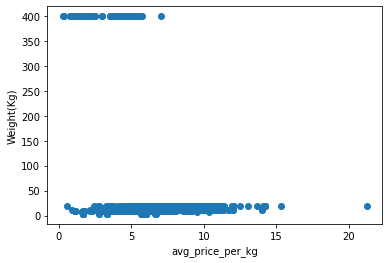

In [6]:
plt.scatter(train_set["avg_price_per_kg"], train_set['Weight_Kg'])
plt.ylabel("Weight(Kg)")
plt.xlabel("avg_price_per_kg")
plt.show()

We note that most of the apples have a weight lower than 25 kilogram and a few have a high weight of exactly 400 kilogram with no values inbetween. Apples at exactly 400 kg are considerable lower priced. We also note one outlier where an apple was sold for near R25.

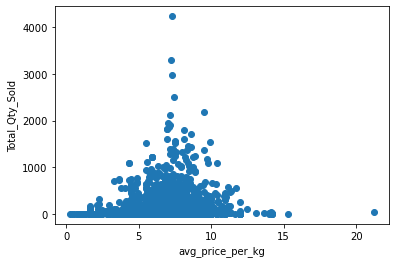

In [7]:
plt.scatter(train_set['avg_price_per_kg'], train_set['Total_Qty_Sold'])
plt.ylabel("Total_Qty_Sold")
plt.xlabel("avg_price_per_kg")
plt.show()

We observe that for most of the average prices of apples per kilogram the total quantity sold is densley populated between 0-2000 apples with prices between R0-R15. There are a few outliers including one Total Quintity Sold of above 4000 apples.

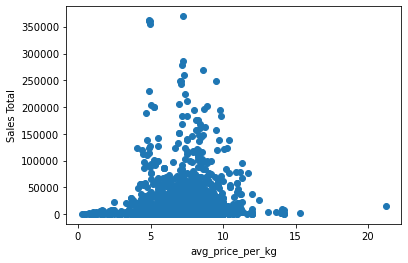

In [8]:
plt.scatter(train_set['avg_price_per_kg'], train_set['Sales_Total'])
plt.ylabel("Sales Total")
plt.xlabel("avg_price_per_kg")
plt.show()

We observe that for most of the average prices the total sales is densley populated between R0-R200000. There are a few outliers once again of above R350 000.

### 2.5. Exploring the data shape, types and testing for null values

In [9]:
#The dataframe has 1952 rows and 13 columns.
train_set.shape

(1952, 13)

In [10]:
#The info method displays the nature of our data i.e datatypes and non-null count.
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


The info summary above shows 1952 entries and it has the following data types: six float type data, two integer type data, five object type data with no null values.

### 2.6. How the  testing data differs from training data

Our Test_set data has 685 rows and 13 columns, our rows are smaller than the train data as expected since the bulk of our data will go into training our model.

The data types also differ in our test data, we have five float type data, three integer type data, five object type data. All columns showing zero null values. In the training data there are six float type and two integer type data.

Test_set statistics vary from train_set ones as we are working with a smaller data set in our test data.

### 2.7. Descriptive statistics of each feature:

In [11]:
train_set.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


### 2.8. Calculating the kurtosis and skew of the data:

In [12]:
train_set.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

We observe that all the feautures are highly skewed in the positive direction except for the average price per kg (which is moderately skewed in a positive direction). For the high positive skewed feautures we have that mode < median < mean.

In [13]:
train_set.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

From the above, we observe that all the feautures have a high kurtosis besides the average price per kg. This indicates that all the feautures have a large number of outliers except for the average price.

### 2.9. More univariate graphical analysis


array([[<AxesSubplot:title={'center':'Weight_Kg'}>,
        <AxesSubplot:title={'center':'Sales_Total'}>]], dtype=object)

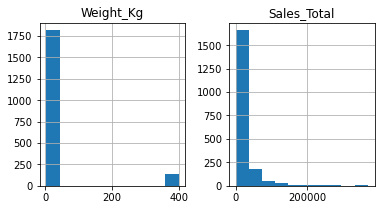

In [14]:
features = ['Weight_Kg', 'Sales_Total'] # create a list of all numerical features
train_set[features].hist(figsize=(6,3))

<AxesSubplot:xlabel='High_Price'>

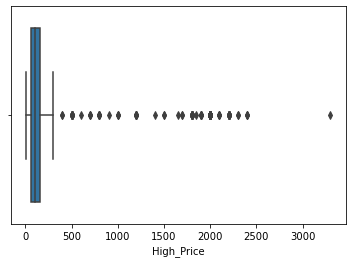

In [15]:
sns.boxplot(x='High_Price', data=train_set)

<AxesSubplot:xlabel='Low_Price'>

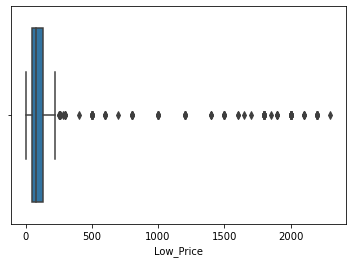

In [16]:
plt.subplot(sns.boxplot(x='Low_Price', data=train_set))

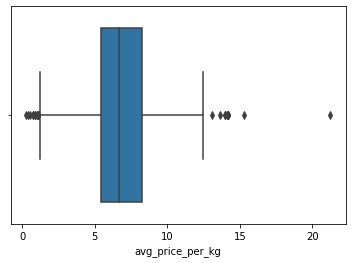

In [17]:
sns.boxplot(x='avg_price_per_kg', data=train_set);

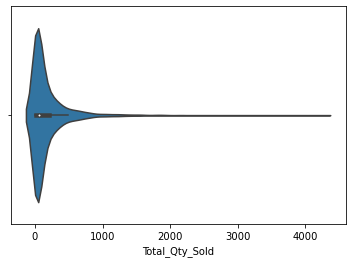

In [18]:
sns.violinplot(x='Total_Qty_Sold', data=train_set);

As expected, we observe that all the feautures are highly skewed to the right except for the average price per kg where outliers are taken into consideration.

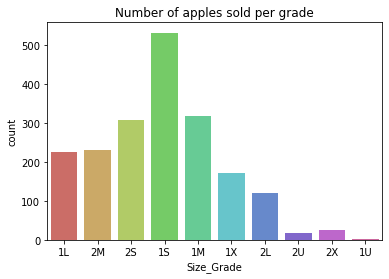

In [19]:
sns.countplot(x = 'Size_Grade', data = train_set, palette="hls")
plt.title("Number of apples sold per grade");

We see that the 1S size_Grade is the most sold.

### 2.10. Considering correlation between parameters 
We now examine the Pearson correlation between two variables:

In [20]:
train_set.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000


We observe that there is a strong relationship (Strong Positive Correlation) between the following variables only:
1. Weight and High price
2. Total Sales and Total Kg Sold 
3. Weight and Low Price



We can also show the Correlation between two variables using a heatmap and derive the same insights as above:

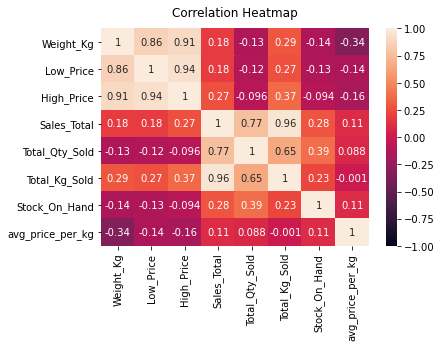

In [21]:
heatmap = sns.heatmap(train_set.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [22]:
train1 = train_set.copy()

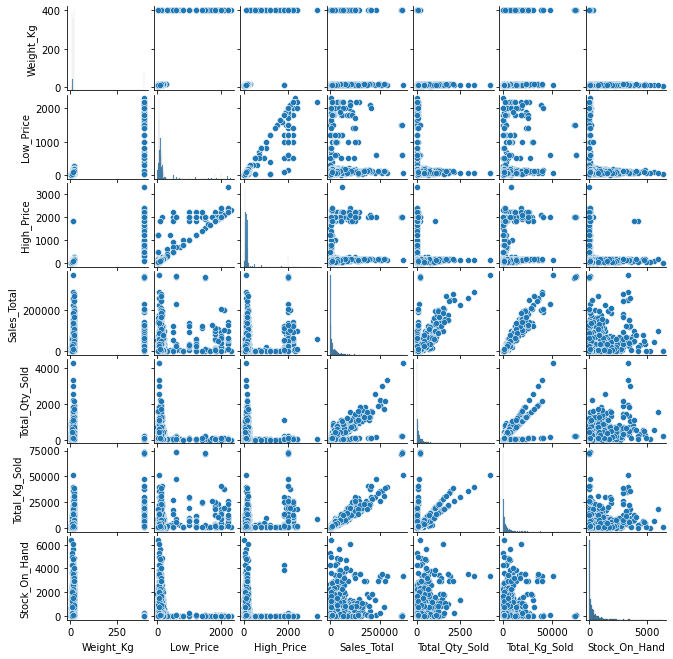

In [71]:
g = pairplot(train1.drop('avg_price_per_kg', axis='columns'))
g.fig.set_size_inches(9,9)

### 2.11 Insights from an in-colour scatter plot

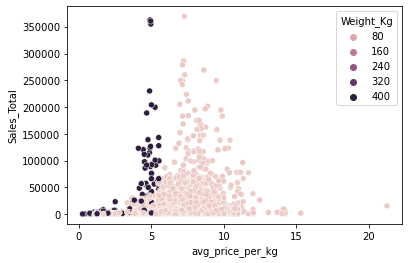

In [28]:
sns.scatterplot(x='avg_price_per_kg',y='Sales_Total',hue='Weight_Kg', data=train_set);

We observe that apples with a lower average price has a higher weight. We also observe that a lot of the apples which are sold have a low weight.

### 2.12. Testing for linearity

In [29]:
# Import Neccessary Packages
from seaborn import pairplot
from statsmodels.graphics.correlation import plot_corr

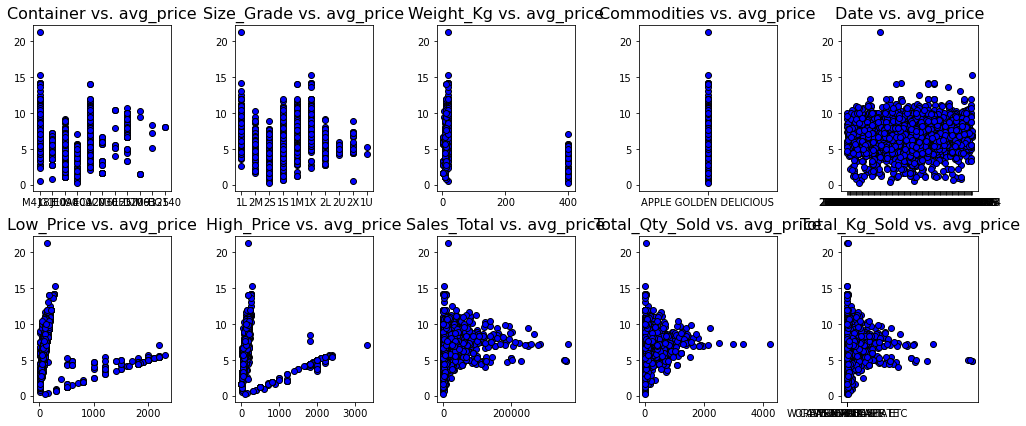

In [30]:
fig, axs = plt.subplots(2,5, figsize=(14,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(train_set.columns):
    if(index<=10):
        axs[index-1].set_title("{} vs. avg_price".format(column),fontsize=16)
        axs[index-1].scatter(x=train_set[column],y=train_set['avg_price_per_kg'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

We observe that there exists a linear relationship between each predictor varible and avg_price_per_kg except Low_Price and High_Price and commoditites that was filtered for Apple Golden Delicious in the beginning. Thus all values can be used. Low_Price and High_Price are correlated with each other.

### 3. Data pre-processing

### 3.1. Transforming categorical data to numerical data 

In [31]:
#Convert categorical data to numerical data
train=train_set.copy()
for i in train.index:
    train.loc[i,"Date"]=train.loc[i,"Date"][:7]
train=pd.get_dummies(train,drop_first=True)

#Replace spaces in column names with underscores
train.columns = train.columns.str.replace(' ','_')

In [32]:
train.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_EASTERN_CAPE,Province_NATAL,...,Date_2020-01,Date_2020-02,Date_2020-03,Date_2020-04,Date_2020-05,Date_2020-06,Date_2020-07,Date_2020-08,Date_2020-09,Date_2020-10
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,0,0,...,0,0,0,0,0,0,0,0,1,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,0,0,...,0,0,0,1,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,0,0,...,0,0,0,1,0,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,0,0,...,0,0,0,0,1,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,1,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
train.shape

(1952, 43)

In [34]:
cols = list(train)
#Move column to last index
cols.insert(len(cols)-1,cols.pop(cols.index("avg_price_per_kg")))

#Update column names
train = train.loc[:, cols]

## 4. Data Splitting 

The data is already conveniently split for us into two CSV files namely training data and testing data both of which was already described above. We noted that the testing data is only concerned with Appled Golden Delicious commoditiy and is considerably smaller in size.
Because of this there will be no need for cross-validation or a verification.

## 5. Building the regression models <a name="regress"></a>
### 5.1. Method 1: A simple linear reggression model following the Least Squares Method
#### 5.1.1. Calculating the slope and the intercept 

In [35]:
#Split predictors and response
X = train_set['Weight_Kg']
Y = train_set['avg_price_per_kg']

#Calculating x bar, y bar
x_bar = np.mean(X)
y_bar = np.mean(Y)

#Calculating Slope
b = sum((X-x_bar) * (Y-y_bar)) / sum((X-x_bar)**2)

#Calculating intercept
a = y_bar - b*x_bar

print("Slope = " + str(b))
print("Intercept = " + str(a))

Slope = -0.0076244934807224145
Intercept = 7.0873874015160885


#### 5.1.2. Plotting our regression line on a scatter plot

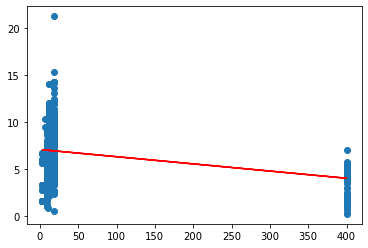

In [36]:
# Define a function to generate values of y from a list of x, 
# Given parameters a and b

def gen_y(x_list, a, b):
    y_gen = []
    for x_i in x_list:
        y_i = a + b*x_i
        y_gen.append(y_i)

    return(y_gen)

#Generates y-values for given x-values based on parameters a, b
y_gen2 = gen_y(X, a, b)

#Plot the graph
plt.scatter(X, Y)
plt.plot(X, y_gen2, color='red')
plt.show()

#### Regression for least squres with best fit line

#### 5.1.3. Assessing our results

In [37]:
errors = np.array(Y - y_gen2)
np.round(errors, 2)

array([ 1.56, -2.45, -0.91, ..., -1.35, -4.22,  0.61])

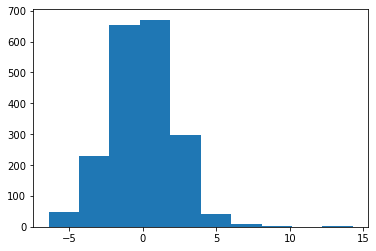

In [38]:
plt.hist(errors)
plt.show()

It seems that our prediction is quote accurate only considering the training data and only considering the weight column as an independent variable. This however is not satisfactory since our model is univariate and multiple conditions need to be taken into account.

In [39]:
# Overall error of the fit
print('Residual Sum of Squares:', (errors ** 2).sum())

Residual Sum of Squares: 8739.552582265216


In [40]:
#Mean Squared Error to assess fit of model
print('MSE:', (1/len(X))*(errors ** 2).sum())

MSE: 4.477229806488328


There is no 'correct' Mean Squared Error. The model's MSE is ~ 4.5 units from a perfect fit (MSE=0)

In [41]:
# R Squared method to assess fit of model
print("R^2:", 1 - (errors**2).sum()/((Y - y_bar)**2).sum())

R^2: 0.11416723112994909


R Squared is closer to 0 than it is to 1. This indicates that the regression does not explain much of the variability in the response.

### 5.2. Method 2: A multivariate linear regression model using sklearn Linear Regression

#### Building and fitting the model

In [42]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [86]:
X_train = train.drop(['avg_price_per_kg'], axis = 1)
Y_train = train['avg_price_per_kg']
X_test = test_set.drop(['avg_price_per_kg'], axis = 1)
Y_test = test_set['avg_price_per_kg']

KeyError: "['avg_price_per_kg'] not found in axis"

In [82]:
# create model object
LR_train = LinearRegression()
LR_test = LinearRegression()

In [83]:
# train model
LR_train.fit(X_train, Y_train)
LR_test.fit(X_test, Y_test)

NameError: name 'Y_train' is not defined

In [75]:
# extract model intercept
beta_0 = float(LR_train.intercept_)
print("Intercept:", beta_0)

Intercept: -14408716.899317399


In [78]:
# extract and show model coeffs
beta_js = pd.DataFrame(LR_train.coef_, X.columns, columns=['Coefficient'])
beta_js.head(7)

,Coefficient
Weight_Kg,4.802909e+06
Low_Price,5.893368e-04
High_Price,1.239656e-03
Sales_Total,5.868577e-05
Total_Qty_Sold,-1.989652e-03
Total_Kg_Sold,-3.007225e-04
Stock_On_Hand,-7.226928e-05


#### Assess our results

In [80]:
#Importing the necessary packages
from sklearn import metrics
import math

In [87]:
#Working out the RMSE of the test data
RMSE = math.sqrt(metrics.mean_squared_error(Y_test, slr.predict(X_test)))
print('The RMSE of the test data is: ' + RMSE)

NameError: name 'Y_test' is not defined

#### Fitting the model with the submission testing data

### 5.3. Method 3: A multivariate linear regression model using statsmodels

#### Build and train the model

In [53]:
#Importing the statsmodels package
import statsmodels.formula.api as sm

The Date is still giving us the same error even though we removed the day:"PatsyError:numbers besides '0' and '1' are only allowed with**".It was then left out of our stats models. It also stated that "Province_W.CAPE-BERGRIVER_ETC" was not defined,we dropped that column as well.

In [54]:
#Creating a copy of the train to work on, so any changes we make do not affect the original dataframe
train2 = train.copy()

In [55]:
#Droping the column from our copy of the train dataframe. 
train2 = train2[train2["Province_W.CAPE-BERGRIVER_ETC"] == 1]
train2 = train2.drop(["Province_W.CAPE-BERGRIVER_ETC"], axis=1)

In [56]:
#Generating the regression string
formula_str = train2.columns[-1]+' ~ '+'+'.join(train2.columns[0:31]); formula_str

'avg_price_per_kg ~ Weight_Kg+Low_Price+High_Price+Sales_Total+Total_Qty_Sold+Total_Kg_Sold+Stock_On_Hand+Province_EASTERN_CAPE+Province_NATAL+Province_ORANGE_FREE_STATE+Province_TRANSVAAL+Province_WEST_COAST+Container_DT063+Container_EC120+Container_EF120+Container_EG140+Container_IA400+Container_JE090+Container_JG110+Container_M4183+Container_M6125+Container_M9125+Size_Grade_1M+Size_Grade_1S+Size_Grade_1U+Size_Grade_1X+Size_Grade_2L+Size_Grade_2M+Size_Grade_2S+Size_Grade_2U+Size_Grade_2X'

In [57]:
#Constructing the model using Ordinary Least Squares regression model
model2 = sm.ols(formula = formula_str, data = train2)


In [58]:
#Fitting the OLS model we constructed above
fitted = model2.fit()

In [59]:
#Viewing the fitted model summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     68.19
Date:                Mon, 17 May 2021   Prob (F-statistic):          2.31e-115
Time:                        12:14:37   Log-Likelihood:                -639.54
No. Observations:                 440   AIC:                             1319.
Df Residuals:                     420   BIC:                             1401.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

#### Plot our results

In [60]:
#Importing packages to show how our predictor variables interact with our reponse variable
from statsmodels.graphics.regressionplots import plot_partregress_grid
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

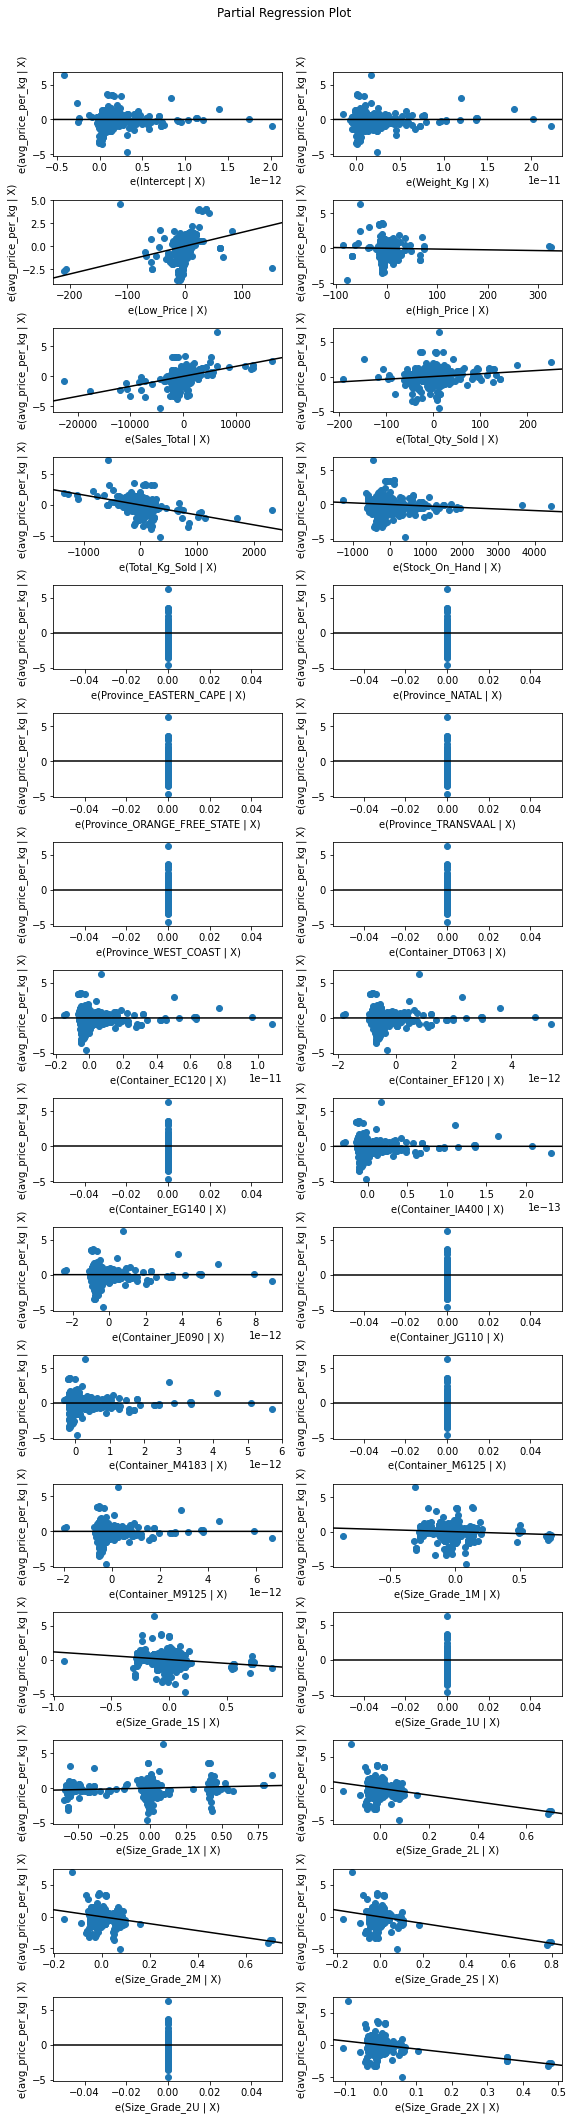

In [61]:
#Ploting partial regression plots
fig = plt.figure(figsize=(8, 30))
plot_partregress_grid(fitted, fig=fig)
plt.show()

#### Assess our results

Our partial regression plots show us how avg_price_per_kg which is our dependent variable interact with all our independent variables. The following independent variables seem to have a linear relationship with avg_price_per_kg: Sales_Total, Total_kg_sold and Size_Grade.

#### Testing for independence

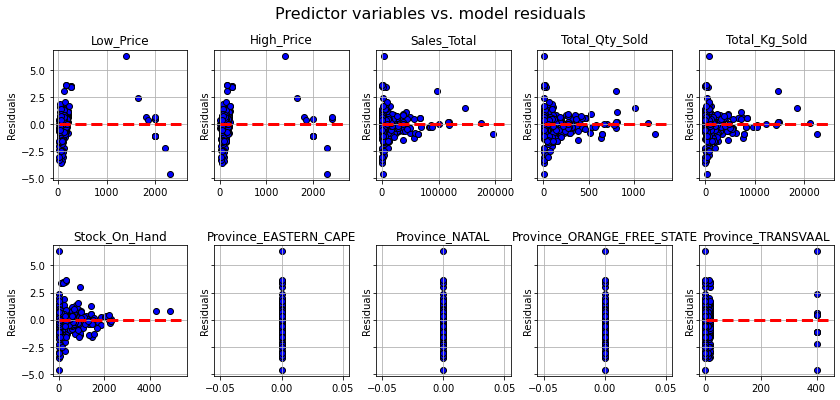

In [62]:
#Ploting Residuals vs Predictor Variable Plots
fig, axs = plt.subplots(2,5, figsize=(14,6),sharey=True)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
fig.suptitle('Predictor variables vs. model residuals', fontsize=16)
axs = axs.ravel()

for index, column in enumerate(train2.columns):
    if(index<=10):
        axs[index-1].set_title("{}".format(column),fontsize=12)
        axs[index-1].scatter(x=train2[column],y=fitted.resid,color='blue',edgecolor='k')
        axs[index-1].grid(True)
        xmin = min(train2[column])
        xmax = max(train2[column])
        axs[index-1].hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
        axs[index-1].set_ylabel('Residuals')

#### Testing for homoscedasticity

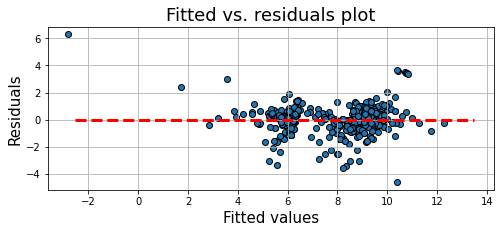

In [63]:
#plotting our fitted model vs. residuals
plt.figure(figsize=(8,3))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin = min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

#### Testing for normality

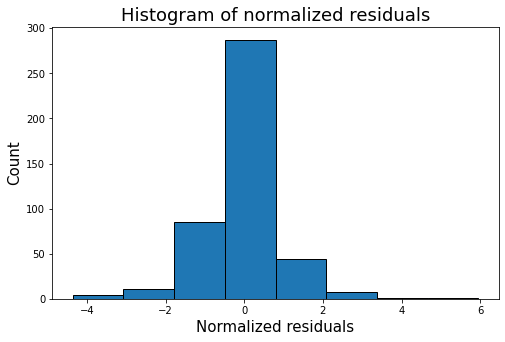

In [64]:
#Plotting Histogram of Normalized Residuals
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=8,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

Q-Q plot of normalized residuals

In [66]:
#Importing Q-Qplot from stats models 
from statsmodels.graphics.gofplots import qqplot

<Figure size 576x360 with 0 Axes>

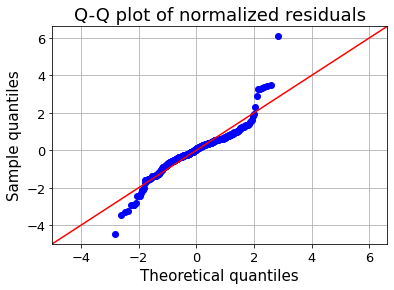

In [67]:
#Plotting a Q-Q plot of the normalized residuals
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

#### Check for outliers in residuals <a name="outliers"></a>
Plotting Cook’s distance

In [68]:
#Importing OLSInfluence from stats models outliers_influence
from statsmodels.stats.outliers_influence import OLSInfluence as influence

In [69]:
#Applying influence on our OLS model:fitted
inf=influence(fitted)

C:\Users\stanj\Atom\Anacondas\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


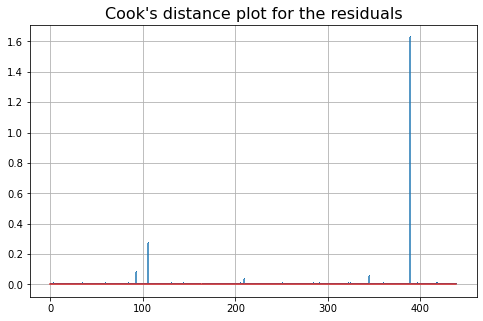

In [70]:
#Plotting cooks distance plot for the residuals
(c, p) = inf.cooks_distance
plt.figure(figsize=(8,5))
plt.title("Cook's distance plot for the residuals",fontsize=16)
plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)
plt.grid(True)
plt.show()

### Variable Selection by Correlation and Significance

In [ ]:
train_set_dummies=train_set.copy()
for i in train_set_dummies.index:
    train_set_dummies.loc[i,"Date"]=train_set_dummies.loc[i,"Date"][:7]
train_set_dummies = pd.get_dummies(train_set_dummies)

# Again we make sure that all the column names have underscores instead of whitespaces
train_set_dummies.columns = [col.replace(" ","_") for col in train_set_dummies]

train_set_dummies.head()

In [ ]:
train_set_dummies.shape

In [ ]:
column_titles = [col for col in train_set_dummies.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
train_set_dummies=train_set_dummies.reindex(columns=column_titles)


In [ ]:
# Calculate correlations between predictor variables and the response variable
corrs = train_set_dummies.corr()['avg_price_per_kg'].sort_values(ascending=False)

In [ ]:
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
dfm = train_set_dummies.copy()

# The dependent variable:
y_name = 'avg_price_per_kg'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

In [ ]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

#Consider the size of the condition number and the range of the coefficients and expected errors vs absolute size of the coefficients themselves.
1. The condition number is large, 6.56e+05.


We will Store the correlation coefficeints and p-values in a separate DataFrame for reference.

In [ ]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= '']
for col in column_titles:
    p_val = round(pearsonr(df_dummies[col], df_dummies['avg_price_per_kg'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}

train_set_cp = pd.DataFrame(dict_cp).T
train_set_cp_sorted = train_set_cp.sort_values('P_Value')
train_set_cp_sorted[train_set_cp_sorted['P_Value']<0.1]

 We now Put the variable with a significant correlation in a separate dataframe (look at the P-values)

In [ ]:
# The dependent variable remains the same:
y_data = train_set_dummies[y_name]  # y_name = 'Loan_Size'

# Model building - Independent Variable (IV) DataFrame
X_names = list(train_set_cp[train_set_cp['P_Value'] < 0.05].index)
X_data = train_set_dummies[X_names]

Then we look for predictor variable pairs with high correlation to each other and drop appropriate variables.

In [ ]:
# Create the correlation matrix
corr = X_data.corr()

# Find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

In [ ]:
# As before, we create the correlation matrix
# and find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

In [ ]:
# Lets take a new subset of our potential independent variables

X_remove = ['High_Price']
X_remove = ['Low_Price']
X_corr_names = [col for col in X_names if col not in X_remove]

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

### 5.4. Multivariate regression model uing sklearn.SVR

### 5.5. Multivariate regression model using sklearn.decisiontreeregressor

### 5.6. Making use of Heterogeneous Ensembles - Voting Method

## 7. Conclusion <a name="conclude"></a>

### What we accomplished. 
### What we learnt.
